In [2]:
import datetime as dt
import yfinance as yf
import pandas as pd

stocks = ["AMZN","MSFT","MINDTREE-BL.NS"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
cl_price.isna().sum()

AMZN                 0
MSFT                 0
MINDTREE-BL.NS    2514
dtype: int64

# Handling NaN values

In [9]:
cl_price.fillna({'AMZN':0,'MINDTREE-BL.NS':3})

,AMZN,MSFT,MINDTREE-BL.NS
Date,,,
2012-11-02,11.621000,24.194624,3.0
2012-11-05,11.716500,24.301245,3.0
2012-11-06,11.878000,24.489876,3.0
2012-11-07,11.603000,23.850153,3.0
2012-11-08,11.367500,23.628708,3.0
...,...,...,...
2022-10-24,119.820000,247.250000,3.0
2022-10-25,120.599998,250.660004,3.0
2022-10-26,115.660004,231.320007,3.0


In [17]:
cl_price.fillna(method='ffill',axis=0)

,AMZN,MSFT,MINDTREE-BL.NS
Date,,,
2012-11-02,11.621000,24.194624,NaN
2012-11-05,11.716500,24.301245,NaN
2012-11-06,11.878000,24.489876,NaN
2012-11-07,11.603000,23.850153,NaN
2012-11-08,11.367500,23.628708,NaN
...,...,...,...
2022-10-24,119.820000,247.250000,3159.149902
2022-10-25,120.599998,250.660004,3159.149902
2022-10-26,115.660004,231.320007,3159.149902


In [20]:
cl_price.dropna(axis=1)

,AMZN,MSFT
Date,,
2012-11-02,11.621000,24.194624
2012-11-05,11.716500,24.301245
2012-11-06,11.878000,24.489876
2012-11-07,11.603000,23.850153
2012-11-08,11.367500,23.628708
...,...,...
2022-10-24,119.820000,247.250000
2022-10-25,120.599998,250.660004
2022-10-26,115.660004,231.320007


In [23]:
cl_price.dropna(axis=0)

,AMZN,MSFT,MINDTREE-BL.NS
Date,,,
2022-10-03,115.879997,240.740005,3159.149902


# Basic Statistics

In [25]:
import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [26]:
cl_price.mean()

AMZN     72.502381
MSFT    114.012007
GOOG     58.060477
dtype: float64

In [27]:
cl_price.std()

AMZN    53.817209
MSFT    90.443638
GOOG    35.282401
dtype: float64

In [28]:
cl_price.describe()

,AMZN,MSFT,GOOG
count,2515.000000,2515.000000,2515.000000
mean,72.502381,114.012007,58.060477
std,53.817209,90.443638,35.282401
min,11.030000,21.805248,16.119081
25%,21.188251,40.790501,29.150467
50%,55.183998,77.815994,49.933998
75%,107.891750,179.039742,71.515251
max,186.570496,340.882812,150.709000


In [31]:
daily_return=cl_price.pct_change()
daily_return

,AMZN,MSFT,GOOG
Date,,,
2012-11-02,NaN,NaN,NaN
2012-11-05,0.008218,0.004407,-0.007210
2012-11-06,0.013784,0.007762,-0.001816
2012-11-07,-0.023152,-0.026122,-0.021416
2012-11-08,-0.020296,-0.009285,-0.022230
...,...,...,...
2022-10-24,0.004190,0.021188,0.014683
2022-10-25,0.006510,0.013792,0.019035
2022-10-26,-0.040962,-0.077156,-0.096350


In [32]:
daily_return.describe()

,AMZN,MSFT,GOOG
count,2514.000000,2514.000000,2514.000000
mean,0.001075,0.001049,0.000829
std,0.020256,0.016866,0.016832
min,-0.140494,-0.147390,-0.111008
25%,-0.008343,-0.006568,-0.006611
50%,0.001137,0.000786,0.000705
75%,0.011168,0.009405,0.008869
max,0.141311,0.142169,0.160524


In [36]:
daily_return.mean(axis=1,skipna=True)

Date
2012-11-02         NaN
2012-11-05    0.001805
2012-11-06    0.006577
2012-11-07   -0.023563
2012-11-08   -0.017270
                ...   
2022-10-24    0.013354
2022-10-25    0.013112
2022-10-26   -0.071489
2022-10-27   -0.027935
2022-10-28    0.005053
Length: 2515, dtype: float64

In [41]:
daily_return.rolling(window=10).mean()

,AMZN,MSFT,GOOG
Date,,,
2012-11-02,NaN,NaN,NaN
2012-11-05,NaN,NaN,NaN
2012-11-06,NaN,NaN,NaN
2012-11-07,NaN,NaN,NaN
2012-11-08,NaN,NaN,NaN
...,...,...,...
2022-10-24,0.005702,0.007805,0.004361
2022-10-25,0.007637,0.010859,0.006933
2022-10-26,0.002926,0.002993,-0.002957


In [47]:
daily_return.ewm(com=10,min_periods=2).mean().head(10)

,AMZN,MSFT,GOOG
Date,,,
2012-11-02,NaN,NaN,NaN
2012-11-05,NaN,NaN,NaN
2012-11-06,0.011133,0.006164,-0.004384
2012-11-07,-0.001400,-0.005638,-0.010611
2012-11-08,-0.006819,-0.006684,-0.013943
2012-11-09,-0.006281,-0.004915,-0.006651
2012-11-12,-0.004822,-0.008305,-0.004359
2012-11-13,-0.003815,-0.012759,-0.005466
2012-11-14,-0.005909,-0.012157,-0.006215


<AxesSubplot: xlabel='Date'>

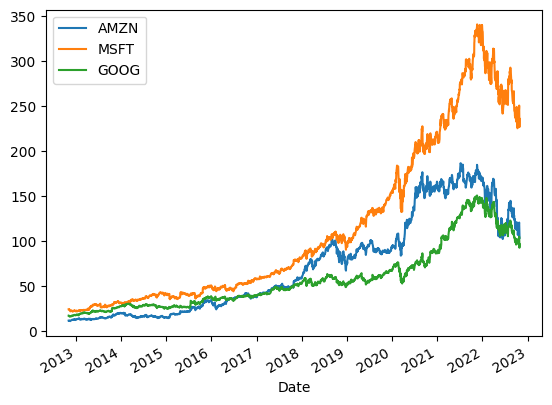

In [50]:
cl_price.plot()

array([[<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
        <AxesSubplot: xlabel='Date'>]], dtype=object)

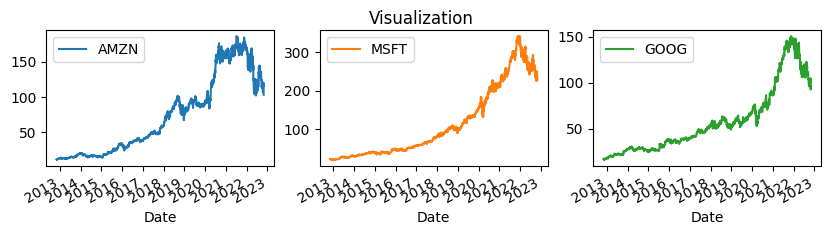

In [56]:
cl_price.plot(subplots=True,layout=(1,3),figsize=(10,2),title='Visualization')

<AxesSubplot: xlabel='Date'>

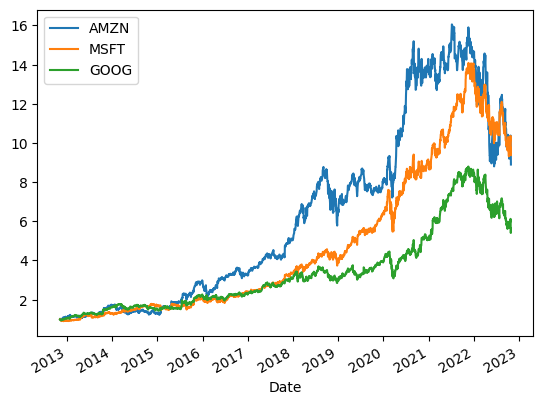

In [58]:
#Cumulative Return

(1+daily_return).cumprod().plot()

#if we have invested even 1 dollar in 2013, amazo

In [59]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

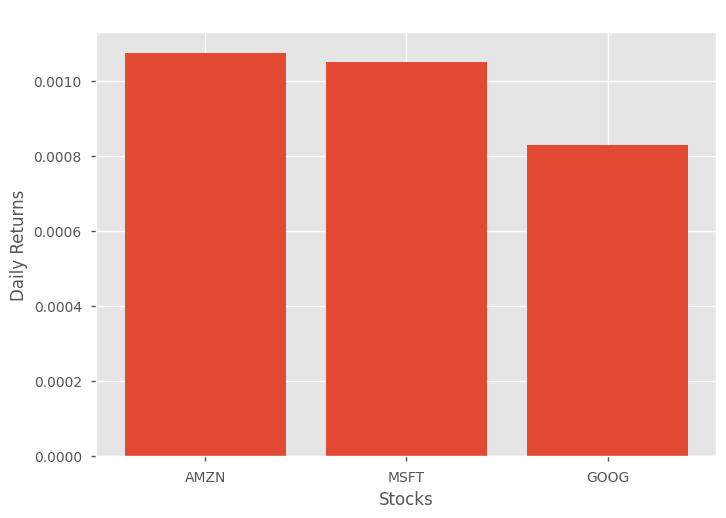

In [75]:
fig,axe=plt.subplots()
plt.style.use('ggplot')
axe.set(title='Daily returns mean',xlabel='Stocks',ylabel='Daily Returns')
plt.bar(x=daily_return.columns,height=daily_return.mean())

In [74]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']